# Barabasi-Albert, power-laws and binning

In [35]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
import collections

### 1. Generate a BA random graph from NetworkX. You can take N = 10^4 − 10^6 with no problems.

In [36]:
# Task 1 N = 10^4 − 10^6 
N = 10**4
M = 3
G_barabasi = nx.barabasi_albert_graph(N, 3)


In [41]:
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0] / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x,bin_means_y

### 2. Plot the degree distribution on a log-log scale

Text(0, 0.5, 'Frequency')

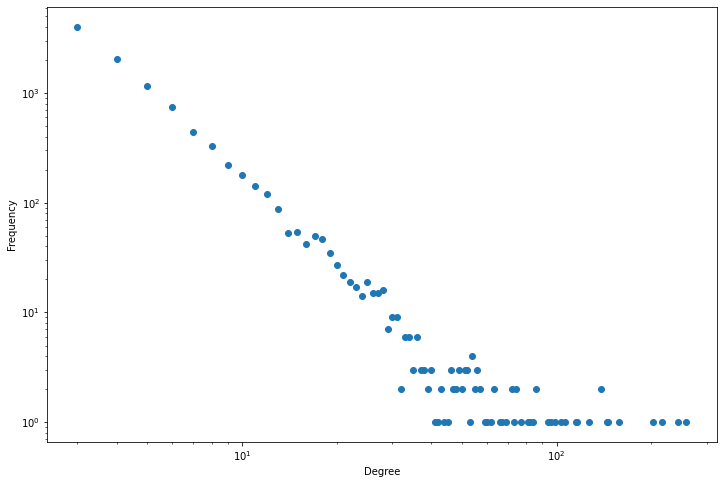

In [42]:
degree_freq = nx.degree_histogram(G_barabasi)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[M:], degree_freq[M:],'o') 
# plot green line of slope -1

plt.xlabel('Degree')
plt.ylabel('Frequency')

### 3.  Try to fit the distribution to a power-law. What happens with the parameters of the distribution?
The parameters of the distribution to power law


In [81]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    ks = [d[1] for d in G.degree()]
    xmin = min(ks)
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    dc2 = dict(zip(range(len(degree)),degree))
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    """ Plot CCDF """
    plt.subplot(1, 3, 2)
    fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
    fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label=r"fit($\alpha$: %.2f, $x_{min}$: %d)" % (fit.alpha, fit.xmin))
    plt.xlabel('Degree')
    plt.ylabel('1- CCDF')
    plt.legend()
    
    """ Plot logarithmic binned CCDF """
    # HINTS: The three relevant distributions with their respective fittings. Green line corresponds to a ”not very good” fit. Red line corresponds to the ”expected slope” of the distribution.
    plt.subplot(1, 3, 3)
    
    x, bins = np.histogram(nx.degree(G),
                       bins=np.logspace(0, 8, num=9, base=2.),
                       density=True)
    
    fit = powerlaw.Fit(bins[1:], fit_method='KS')
    # plot fit ccdf 
    fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
    fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label=r"fit($\alpha$: %.2f, $x_{min}$: %d)" % (fit.alpha, fit.xmin))
    # plt.plot(bins[1:], x, 'bo')
    plt.loglog()

    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    

/var/folders/2c/gnzzbzv56sxdqjpm4jd2152m0000gn/T/ipykernel_2778/1488887938.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  M = nx.to_scipy_sparse_matrix(G)
/var/folders/2c/gnzzbzv56sxdqjpm4jd2152m0000gn/T/ipykernel_2778/1488887938.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


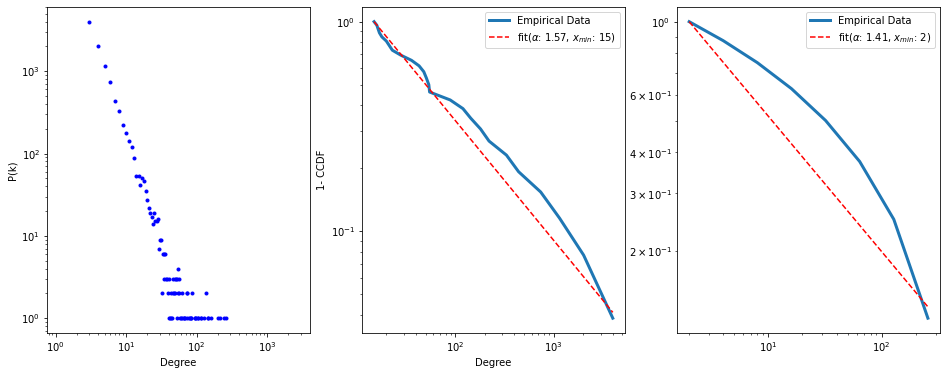

In [82]:
plot_dist(G_barabasi)

I think that the grade distribution in the end has a lot of noise, because there are many values in the same area. The best is the 1-CDF, because by doing a cumulative distribution we get a straighter line thanks to the smoothing of the outliers, while by doing logarithmic binning at the end we are discretising so we get the representative image.
